## Network/Signature Analysis 
**Introduction**

https://bits-pilani.instructure.com/files/248029/download?download_frd=1 (Links to an external site.)

The requirement here is to make a ANN model that determines the network intrusion, wherein the network intrusion detection system have become a major component in network security infrastructure.


**Dataset**

Dataset Location : https://bits-pilani.instructure.com/files/248029/download?download_frd=1

### Group 226
| Name | Bits ID | Contrubition |
| :--------------- | :--------------- | :--------------- |
| Chavhan Kalpesh Shantilal	| 2020sc04653@wilp.bits-pilani.ac.in | Equal (100%) |
| Tirth Sarkar	| 2020sc04161@wilp.bits-pilani.ac.in 	| Equal (100%) |
| Manikandan P	| 2020sc04643@wilp.bits-pilani.ac.in 	| Equal (100%) |


#### Dataset
Please change file location if required.

**Assumption** Following are categorical feature
- class protocol_type 
- flag service
- is_guest_login 
- logged_in
- root_shell
- land

In [1]:
#load dataframe from local csv
datafile = "C:\\Users\\kachavan\\Documents\\GitHub\\BITS-DSE\\Courses\\Semester01\\DM\\Network Intrusion DS.csv"

#load data from csv (github)
data_github = "https://raw.githubusercontent.com/KalpeshChavan12/BITS-DSE/main/Courses/Semester01/DMAssignment/Network Intrusion DS.csv"

### model build and evaluate implemenation 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, precision_recall_fscore_support
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.linear_model import SGDClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.pyplot import figure


import warnings
warnings.filterwarnings('ignore')

class NetworkAnalysis:

    # -------------------------------
    # init all classifier and data
    # -------------------------------
    def __init__(self, filename) -> None:
        self.names = [
            "ANN MLPClassifier sgd, identity",
            "ANN MLPClassifier sgd, logistic",
            "ANN MLPClassifier sgd, tanh",
            "ANN MLPClassifier sgd, relu",
            "ANN MLPClassifier lbfgs, identity",
            "ANN MLPClassifier lbfgs, logistic",
            "ANN MLPClassifier lbfgs, tanh",
            "ANN MLPClassifier lbfgs, relu",
            "ANN MLPClassifier adam, identity",
            "ANN MLPClassifier adam, logistic",
            "ANN MLPClassifier adam, tanh",
            "ANN MLPClassifier adam, relu"]

        # List of classifiers used building model.
        self.classifiers = [
            MLPClassifier(solver='sgd', activation="identity", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='sgd', activation="logistic", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='sgd', activation="tanh", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='sgd', activation="relu", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='lbfgs', activation="identity", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='lbfgs', activation="logistic", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='lbfgs', activation="tanh", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='lbfgs', activation="relu", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='adam', activation="identity", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='adam', activation="logistic", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='adam', activation="tanh", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='adam', activation="relu", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)]

        # List of classifiers used building model.
        self.classifiers_kfold = [
            MLPClassifier(solver='sgd', activation="identity", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='sgd', activation="logistic", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='sgd', activation="tanh", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='sgd', activation="relu", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='lbfgs', activation="identity", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='lbfgs', activation="logistic", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='lbfgs', activation="tanh", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='lbfgs', activation="relu", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='adam', activation="identity", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='adam', activation="logistic", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='adam', activation="tanh", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
            MLPClassifier(solver='adam', activation="relu", alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)]

        self.df = pd.read_csv(filename)

        # Keep orignal data for backup
        self.df_org = self.df.copy()

        pass

    #--------------------------------------------------
    # Drop feature based on correlation > .9
    #--------------------------------------------------
    def DropFeatures(self, df):
        cor_matrix = df.corr().abs()
        upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
        to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

        self.dropped_feature = []
        for f in to_drop:
            df = self.df.drop([f], axis=1)
            self.dropped_feature.append(f)
            
    # -------------------------------
    # Outlier replacement
    # -------------------------------
    def ReplaceOutlierWithMean(self, df, col):
        
        mean = df[col].mean()

        Q3 = np.quantile(df[col], 0.75)
        Q1 = np.quantile(df[col], 0.25)
        IQR = Q3 - Q1
    
        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR
        
        df[col] = np.where((df[col] > upper_range) | (df[col] < lower_range) ,mean, df[col])
        
        return df
    
    #-----------------------------------------------
    # Log tranform colum for skewed data
    #-----------------------------------------------
    def LogTranform(self, df, dryrun=True, threshold=3):
        col_names = df._get_numeric_data().columns
        skw = df.skew()
        self.log_tranform_col = []
        for c in col_names:
            if abs(skw[c]) > 3:
                if not dryrun:
                    df[c] = np.log(df[c]+1) 
                self.log_tranform_col.append(c)

    
    # -------------------------------
    # Preprocess all dataset
    # -------------------------------
    def PreProcess(self):
      
        # Drop invalid/missing value row 
        self.df.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.df = self.df.dropna()
        
        # Change data type and assigned code to catogorical data.
        cat_cols = ["class", 'protocol_type', 'flag', 'service', 'is_guest_login', 'logged_in', 'root_shell', 'land' ]
        for col in cat_cols:
            self.df[col] =self.df[col].astype('category').cat.codes
            self.df[col] = pd.Categorical(self.df[col])
        
        # Normalized data copy
        self.df_norm = self.df.copy()
        
        # list of numerical columns
        col_names = self.df._get_numeric_data().columns
        
        self.LogTranform(self.df_norm, False)
        
        # Normalization using Min Max [0,1].
        features = self.df_norm[col_names]
        scaler = MinMaxScaler().fit(features.values)
        features = scaler.transform(features.values)
        self.df_norm[col_names] = features
        
        # Replace Outlier with mean
        for c in col_names:
            self.df_norm = self.ReplaceOutlierWithMean(self.df_norm, c)        
        
        # PCA
        pca = PCA(n_components=2)
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.SampleData()
        
        self.X_train_pca = pca.fit_transform(self.X_train)
        self.X_test_pca = pca.transform(self.X_test)
        
        
    # -------------------------------
    # Random test train data split
    # -------------------------------
    def SampleData(self):
        x = self.df_norm.drop(['class'], axis=1)
        y = self.df_norm['class']
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123456)
        return X_train, X_test, y_train, y_test
    
    
    # -----------------------------------------------------
    # Build and evaluate model using random test train slit.
    # ----------------------------------------------------
    def Run(self):

        log_cols=["Classifier", "Accuracy", "Prediction", "Recall", "F-Score"]
        self.log = pd.DataFrame(columns=log_cols)
        
        fig= plt.figure(figsize=(20,20))
        
        index = 0
        for clf in self.classifiers:
            
            # Train
            model = clf.fit(self.X_train_pca, self.y_train)
            name = self.names[index]

            y_score_1 =None
            b = False
            if hasattr(model, 'decision_function') : 
                y_score_1 = model.decision_function(self.X_train_pca)
                b = True
            
            # Test
            train_predictions = clf.predict(self.X_test_pca)

            # evaluate score
            acc = accuracy_score(self.y_test, train_predictions)
            prf = precision_recall_fscore_support(self.y_test, train_predictions, average="binary")

            log_entry = pd.DataFrame([[name, acc*100, prf[0]*100, prf[1]*100,prf[2]*100]], columns=log_cols)
            self.log = self.log.append(log_entry)
            
            # Pot decision region
            self.plot_decision_region(clf, index, name)
            
            index += 1
        
        plt.show()
        pass

    # -------------------------------
    # Build and evaluate model and cross validate using kFold
    # -------------------------------
    def BuildEvaluateUsingKFold(self):
        
        X = self.df_norm.drop(['class'], axis=1)
        y = self.df_norm['class'].values
        
        pca = PCA(n_components=2, svd_solver='full')
        
        X_pca = pca.fit_transform(X)
        
        fig= plt.figure(figsize=(20,20))
        
        index = 0
        splits = 20 
        kf = StratifiedKFold(n_splits=splits, shuffle=True) 
        for clf in self.classifiers_kfold:
            
            mae_train = []
            mae_test = []
            for train_index, test_index in kf.split(X_pca, y):
                X_train, X_test = X_pca[train_index], X_pca[test_index]
                y_train, y_test = y[train_index], y[test_index]   
                
                clf.fit(X_train, y_train)
                
                y_train_pred = clf.predict(X_train)
                y_test_pred = clf.predict(X_test)
                mae_train.append(mean_absolute_error(y_train, y_train_pred))
                mae_test.append(mean_absolute_error(y_test, y_test_pred))
            
            self.plot_graph_kfold(mae_train, mae_test, index, self.names[index], splits)
            index += 1
        
        plt.show()

    # -------------------------------
    # Plot graph for kfold
    # -------------------------------
    def plot_graph_kfold(self, mae_train, mae_test, index, name, splits):
        folds = range(1, splits + 1)
        
        g = plt.subplot2grid((4,4), (int(index/4),int(index%4)))
        
        g.plot(folds, mae_train, 'o-', color='green', label='train')
        g.plot(folds, mae_test, 'o-', color='red', label='test')
        g.legend()
        #g.grid()
        g.set_xlabel('Number of fold')
        g.set_ylabel('Mean Absolute Error')
        g.set_title(name)

            
    # -------------------------------
    # Plot graph decision region
    # -------------------------------
    def plot_decision_region(self, clf, index, name):
        self.plot_decision_regions(self.X_train_pca, self.y_train, clf, index = index, name=name)
    
    # -------------------------------
    # Plot graph decision region
    # -------------------------------
    def plot_decision_regions(self, X, y, classifier, resolution=0.20, index = 1, name=""):
        # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        
        g = plt.subplot2grid((4,4), (int(index/4),int(index%4)))
        g.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
        g.set_xlim(xx1.min(), xx1.max())
        g.set_ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y)):
            g.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        alpha=0.6, 
                        c=[cmap(idx)],
                        edgecolor='black',
                        marker=markers[idx], 
                        label=cl)# plot decision regions for training set
        
        g.set_title(name)

In [3]:
NetAnalysis = None
try:
    NetAnalysis = NetworkAnalysis(datafile)
except:
    NetAnalysis = NetworkAnalysis(data_github)

## Data set statistics

In [4]:
NetAnalysis.df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.253800e+04,2.253800e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039812e+04,2.055584e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.728493e+05,2.122190e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Sample data

In [5]:
NetAnalysis.df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


**Feature details and data types**

In [6]:
NetAnalysis.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22538 non-null  float64
 5   dst_bytes                    22538 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

### Missing value check
Data set has some missing values we will drop rows with missing values.

In [7]:
NetAnalysis.df.isna().sum().loc[lambda x : x>0]

src_bytes    6
dst_bytes    6
count        9
srv_count    9
dtype: int64

### Preprocess data
* Replace outlier with mean since data distribution is skewed.
* Normalize data using Min max scale.
* Removed feature with correaltion > .9
* Reduce dimentions using PCA (no. of components 2)
* Log transform for feature if skew > 5

##### Data Skewness details before preprocessing

In [8]:
NetAnalysis.df.skew()

duration                        15.452797
src_bytes                      117.469907
dst_bytes                       47.497729
land                            56.727418
wrong_fragment                  19.252929
urgent                          58.459562
hot                             63.456582
num_failed_logins                7.739911
logged_in                        0.232768
num_compromised                 91.496895
root_shell                      20.172940
num_root                        91.225425
num_shells                      65.657216
num_access_files                25.715871
num_outbound_cmds                0.000000
is_host_login                   45.240771
is_guest_login                   5.674821
count                            1.909460
srv_count                        4.355698
serror_rate                      2.651837
srv_serror_rate                  2.623474
rerror_rate                      1.210648
srv_rerror_rate                  1.243352
same_srv_rate                   -1

In [9]:
NetAnalysis.PreProcess()

In [10]:
NetAnalysis.df_norm.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_shells,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22529.000000,22529.000000,22529.000000,22529.000000,2.252900e+04,22529.000000,22529.000000,22529.000000,22529.000000,2.252900e+04,...,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000
mean,0.009471,0.203362,0.255504,0.000014,1.314126e-07,0.000484,0.000195,0.000036,0.000001,3.235160e-07,...,0.760233,0.551839,0.608600,0.042145,0.030041,0.006525,0.020045,0.016006,0.113230,0.060874
std,0.021988,0.175653,0.242756,0.000214,6.236218e-06,0.002239,0.001326,0.000277,0.000029,1.113567e-05,...,0.368776,0.438366,0.435693,0.047322,0.050641,0.010856,0.039489,0.036546,0.210489,0.100362
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.474510,0.058824,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.223177,0.272816,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,1.000000,0.654902,0.920000,0.014355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.315382,0.453514,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.084064,0.030000,0.014355,0.000000,0.000000,0.233492,0.170000
max,0.060517,0.782409,1.000000,0.003218,2.960595e-04,0.010838,0.009212,0.002185,0.000630,3.836049e-04,...,1.000000,1.000000,1.000000,0.201634,0.132213,0.028569,0.097834,0.099447,0.900000,0.420000


### Feature correlation analysis
Identify relevant, irrelevant attributes for building model. We will drop feature with correaltion > .9

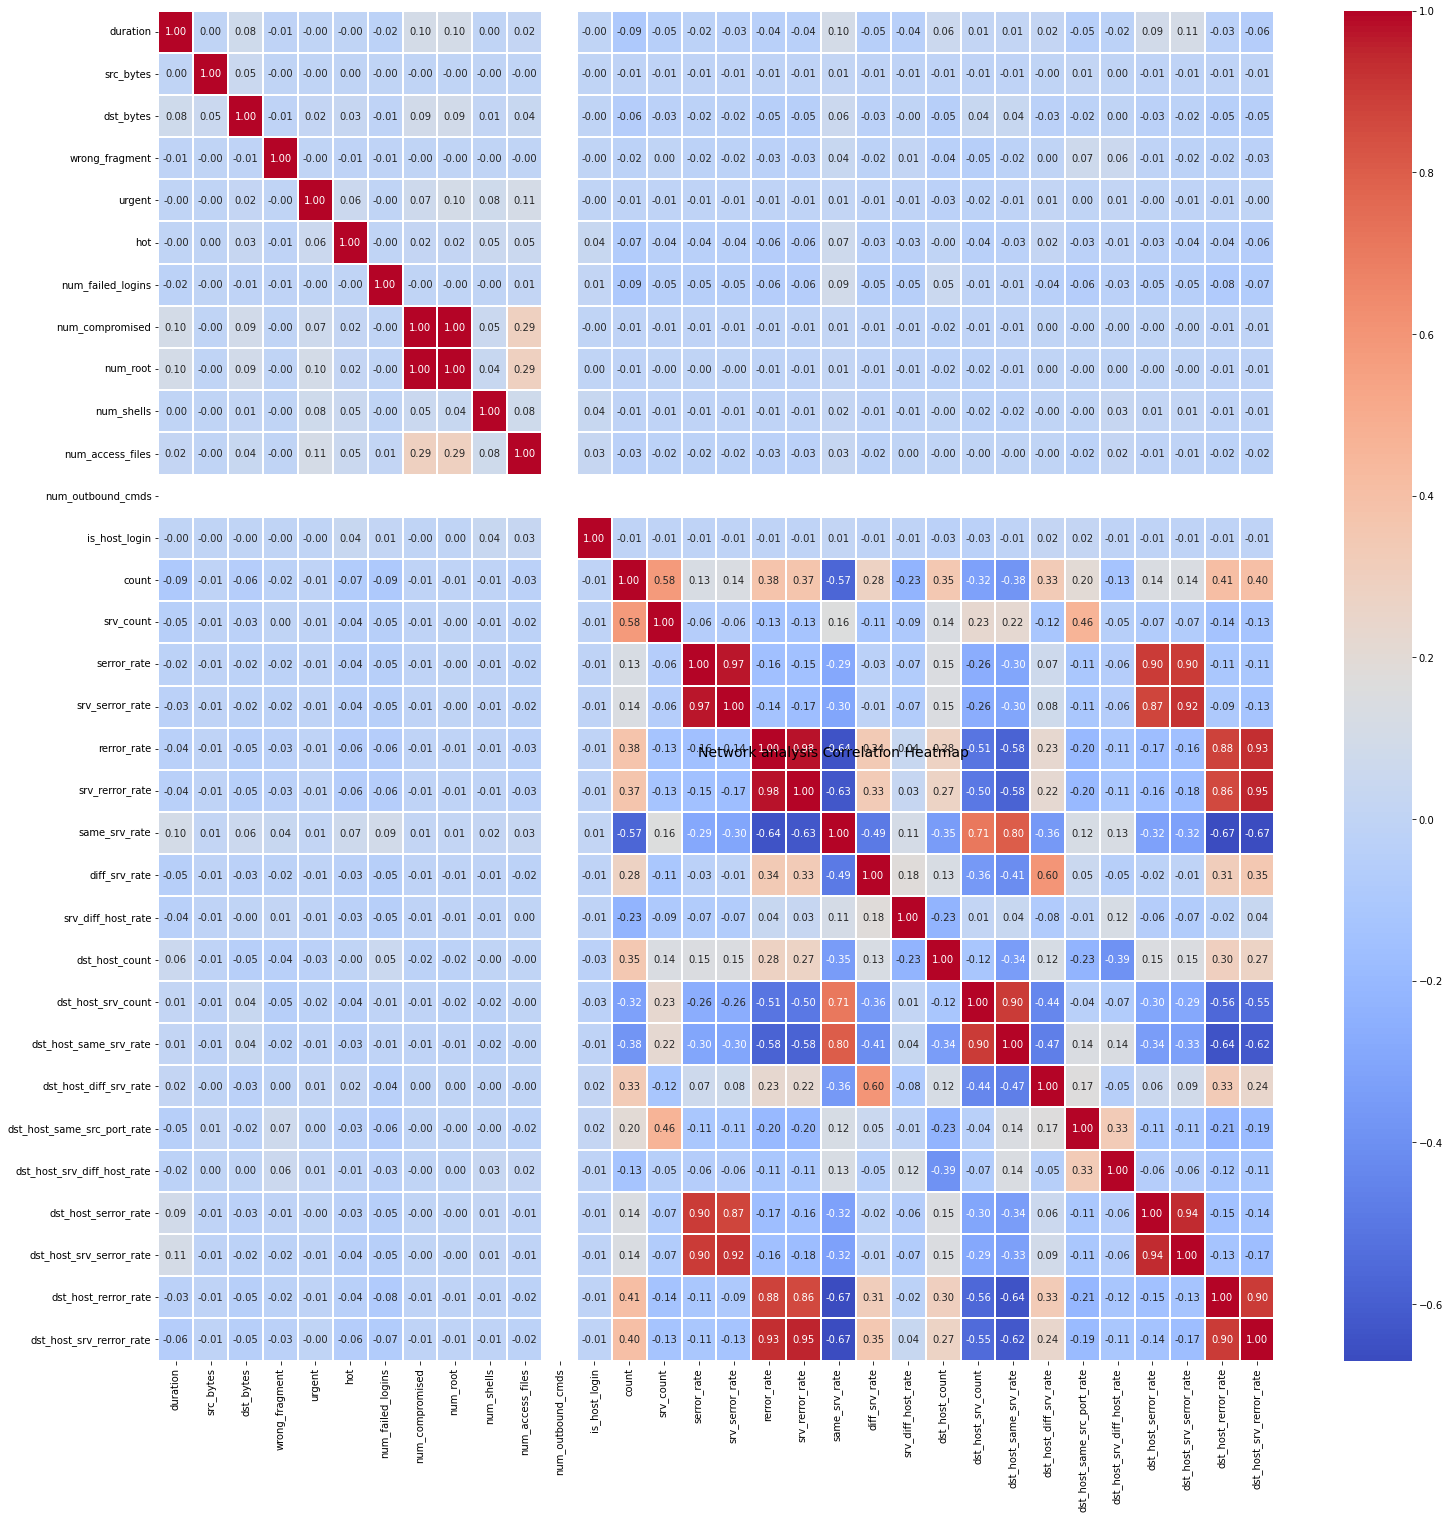

In [11]:
f, ax = plt.subplots(figsize=(25, 10))

dftmp = NetAnalysis.df.copy()
cols = NetAnalysis.df.columns

corr = dftmp.corr(method='pearson')
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.15)
f.subplots_adjust(top=2)
t= f.suptitle('Network analysis Correlation Heatmap', fontsize=14)
plt.show()

In [12]:
NetAnalysis.DropFeatures(NetAnalysis.df_norm)

In [13]:
NetAnalysis.dropped_feature

['srv_rerror_rate',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_rerror_rate']

**Data distribuion and outliers observation using boxplot**

Data is skewed and need to normalized using log tranformer
Before Pre/processing

In [14]:
NetAnalysis.df.skew()

duration                        15.447721
src_bytes                      117.446540
dst_bytes                       47.496546
wrong_fragment                  19.246473
urgent                          58.440096
hot                             63.453498
num_failed_logins                7.747685
num_compromised                 91.466552
num_root                        91.195065
num_shells                      65.635362
num_access_files                25.707282
num_outbound_cmds                0.000000
is_host_login                   45.225698
count                            1.909479
srv_count                        4.357703
serror_rate                      2.651421
srv_serror_rate                  2.623048
rerror_rate                      1.209906
srv_rerror_rate                  1.242616
same_srv_rate                   -1.012618
diff_srv_rate                    2.996488
srv_diff_host_rate               2.815154
dst_host_count                  -1.091695
dst_host_srv_count              -0

Skewed feature for which log tranformation applied

In [15]:
NetAnalysis.log_tranform_col

['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'num_root',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_srv_diff_host_rate']

##### Data destribution of log transform feature before preprocessing

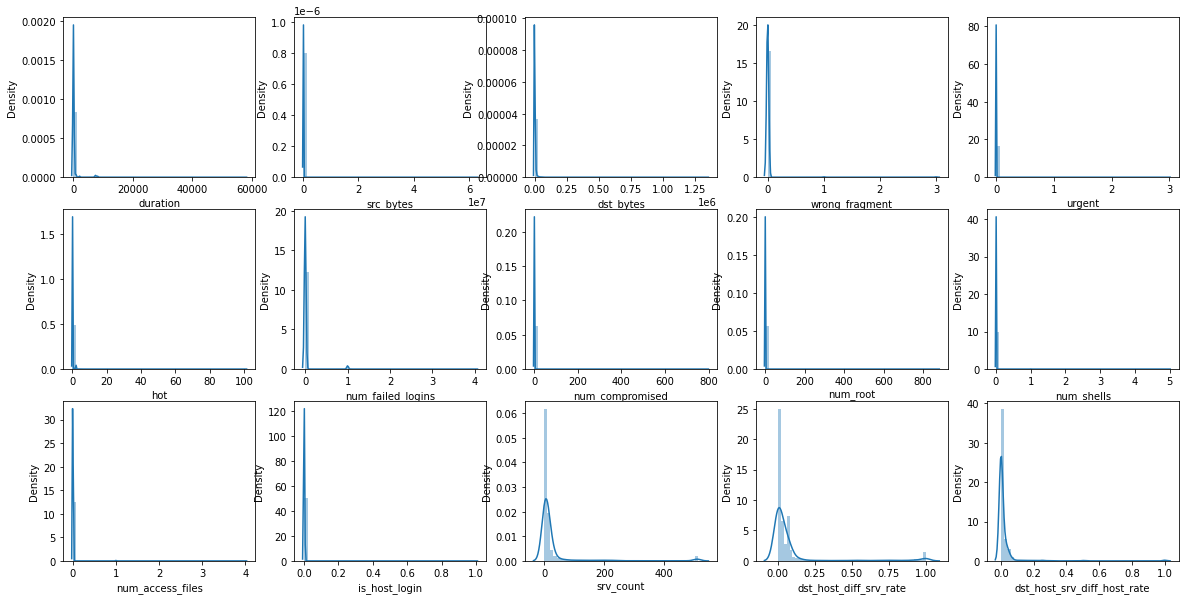

In [16]:
plt.figure(figsize=(20,10))
col_names = NetAnalysis.log_tranform_col

index=1
for c in col_names:
    plt.subplot(int(len(col_names)/4), 5, index)
    sns.distplot(NetAnalysis.df[c])
    index = index+1


##### Data distribution  after preprocessing

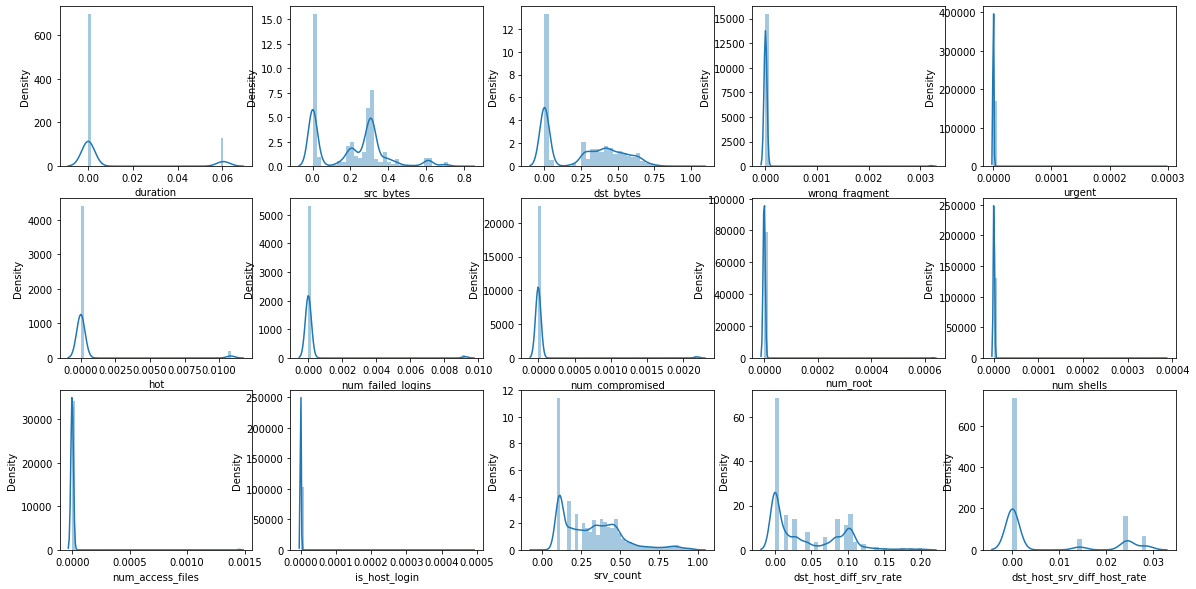

In [17]:
plt.figure(figsize=(20,10))
col_names = NetAnalysis.log_tranform_col

index=1
for c in col_names:
    plt.subplot(int(len(col_names)/4), 5, index)
    sns.distplot(NetAnalysis.df_norm[c])
    index = index+1


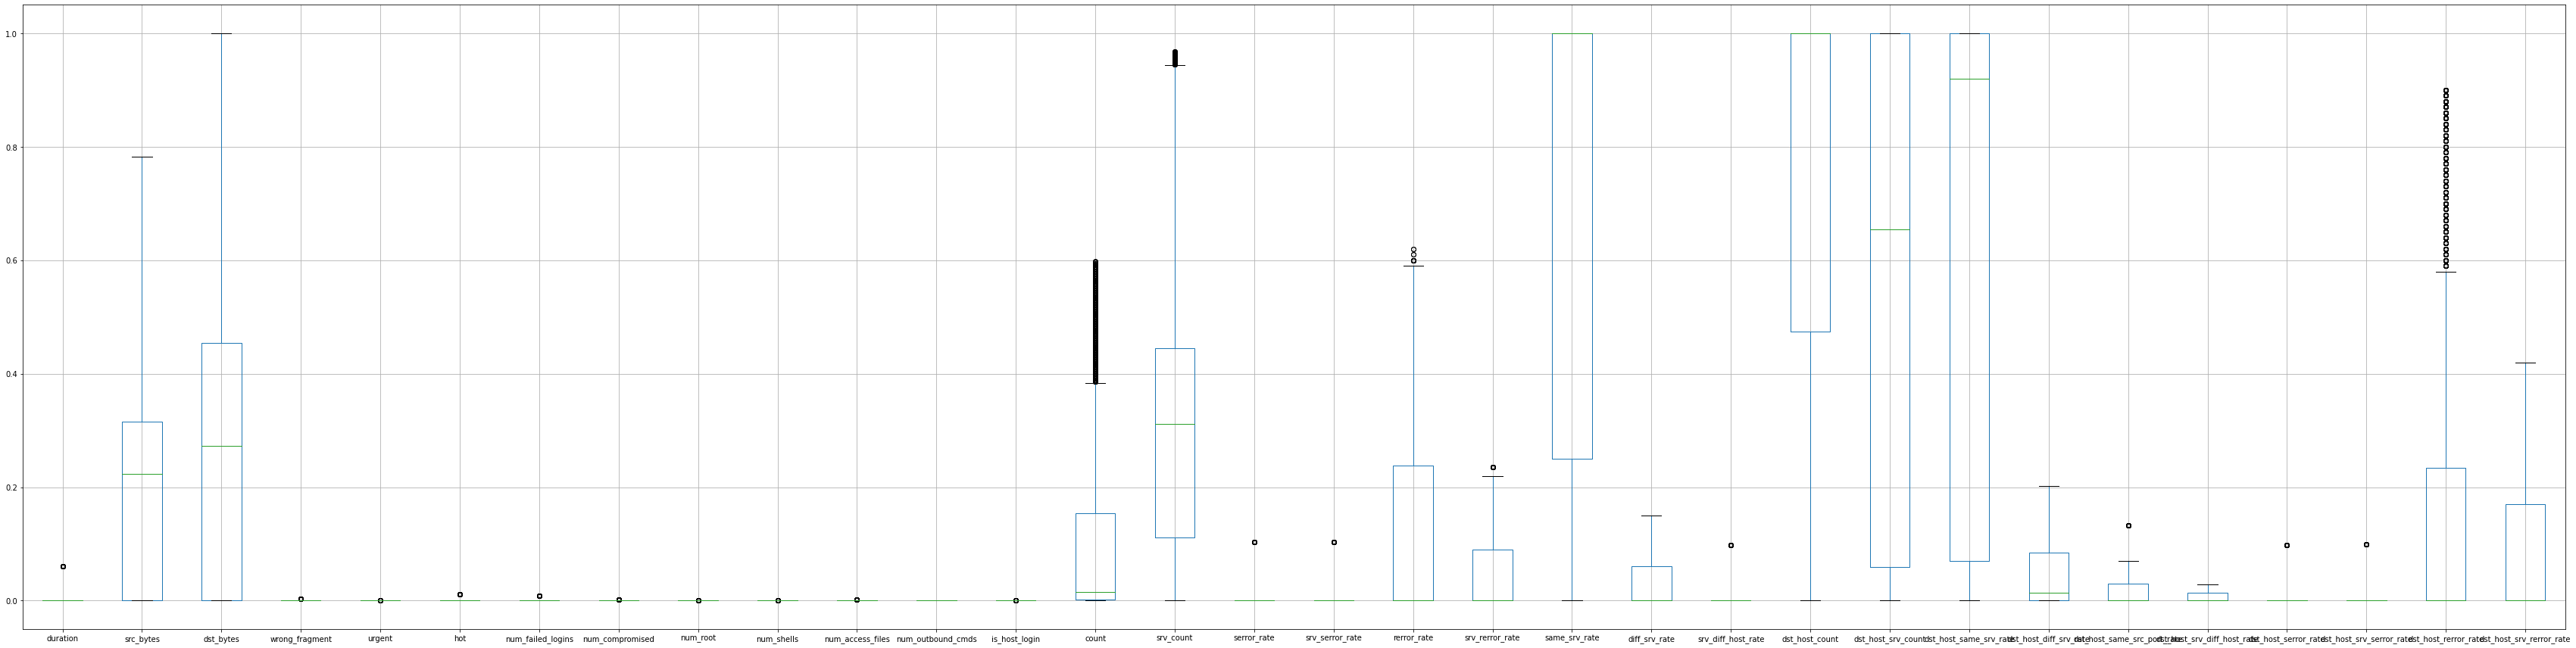

In [18]:
NetAnalysis.df_norm.boxplot()
plt.tight_layout(rect=(0, 0, 8, 3))

#### Visualize data

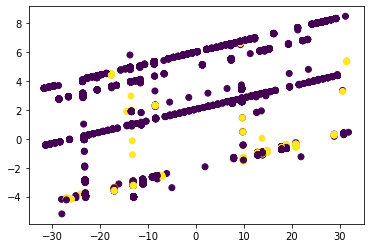

In [19]:
plt.scatter(NetAnalysis.X_train_pca[:, 0], NetAnalysis.X_train_pca[:, 1], c=NetAnalysis.y_train)

### Build and test model 
We will build and evaluate models using following classifiers 

**Model selction method:** test train random split 

**Model accurracy metrices:** Accuracy, Prediction,	Recall,	F-Score

* ANN MLPClassifier solver = sgd, Activation function = identity
* ANN MLPClassifier solver =sgd,  Activation function = logistic
* ANN MLPClassifier solver =sgd,  Activation function = tanh
* ANN MLPClassifier solver =sgd,  Activation function = relu
* ANN MLPClassifier solver =lbfgs,  Activation function = identity
* ANN MLPClassifier solver =lbfgs,  Activation function = logistic
* ANN MLPClassifier solver =lbfgs,  Activation function = tanh
* ANN MLPClassifier solver =lbfgs,  Activation function = relu
* ANN MLPClassifier solver =adam,  Activation function = identity
* ANN MLPClassifier solver =adam,  Activation function = logistic
* ANN MLPClassifier solver =adam,  Activation function = tanh
* ANN MLPClassifier solver = adam,  Activation function = relu

Graph will show decision boundires for all classifier for trained data

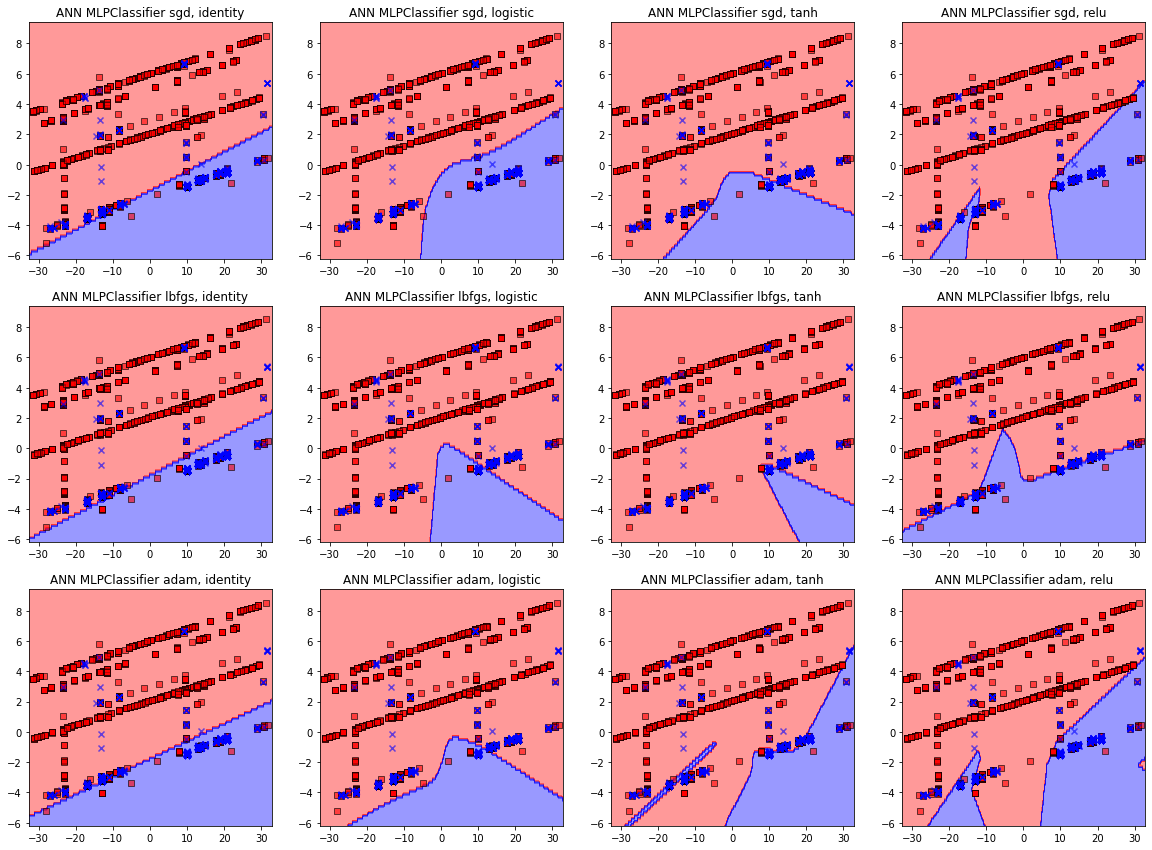

In [20]:
NetAnalysis.Run()

### Model Evaluation metrics using test data

In [21]:
NetAnalysis.log

,Classifier,Accuracy,Prediction,Recall,F-Score
0,"ANN MLPClassifier sgd, identity",81.372984,77.009346,82.592716,79.703369
0,"ANN MLPClassifier sgd, logistic",81.594910,77.439598,82.459071,79.870550
0,"ANN MLPClassifier sgd, tanh",84.346797,95.486601,67.858336,79.335938
0,"ANN MLPClassifier sgd, relu",82.852493,75.729517,90.177080,82.324234
0,"ANN MLPClassifier lbfgs, identity",81.343394,77.045597,82.425660,79.644875
0,"ANN MLPClassifier lbfgs, logistic",84.346797,95.486601,67.858336,79.335938
0,"ANN MLPClassifier lbfgs, tanh",84.405977,95.666510,67.858336,79.397967
0,"ANN MLPClassifier lbfgs, relu",85.826306,80.382204,89.943201,84.894355
0,"ANN MLPClassifier adam, identity",78.917000,73.222749,82.592716,77.626001
0,"ANN MLPClassifier adam, logistic",84.346797,95.486601,67.858336,79.335938


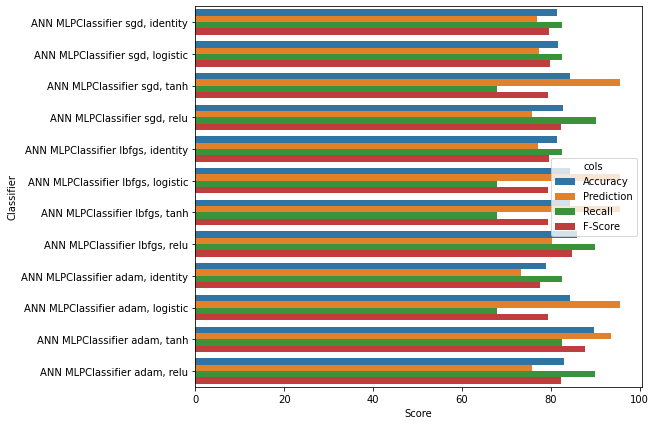

In [22]:
ig= plt.figure(figsize=(8,7))
tmpdf = NetAnalysis.log.melt('Classifier', var_name='cols', value_name='vals')
g = sns.barplot(y="Classifier", x="vals", hue='cols', data=tmpdf, orient = 'h')
g.set(xlabel='Score')
plt.show()

### Model cross verification using StratifiedKFold
We have used cross verfication using StratifiedKFold method for model selection.
A model thats fits the training set well but testing set poorly is said to be overfit to the training set and a model that fits both sets poorly is said to be underfit.

The strategy involves the following steps:

- split the dataset into training and test sets
- train the model with the training set
- test the model on the training and test sets
- calculate the **Mean Absolute Error (MAE)** for training and test sets
- plot and interpret results


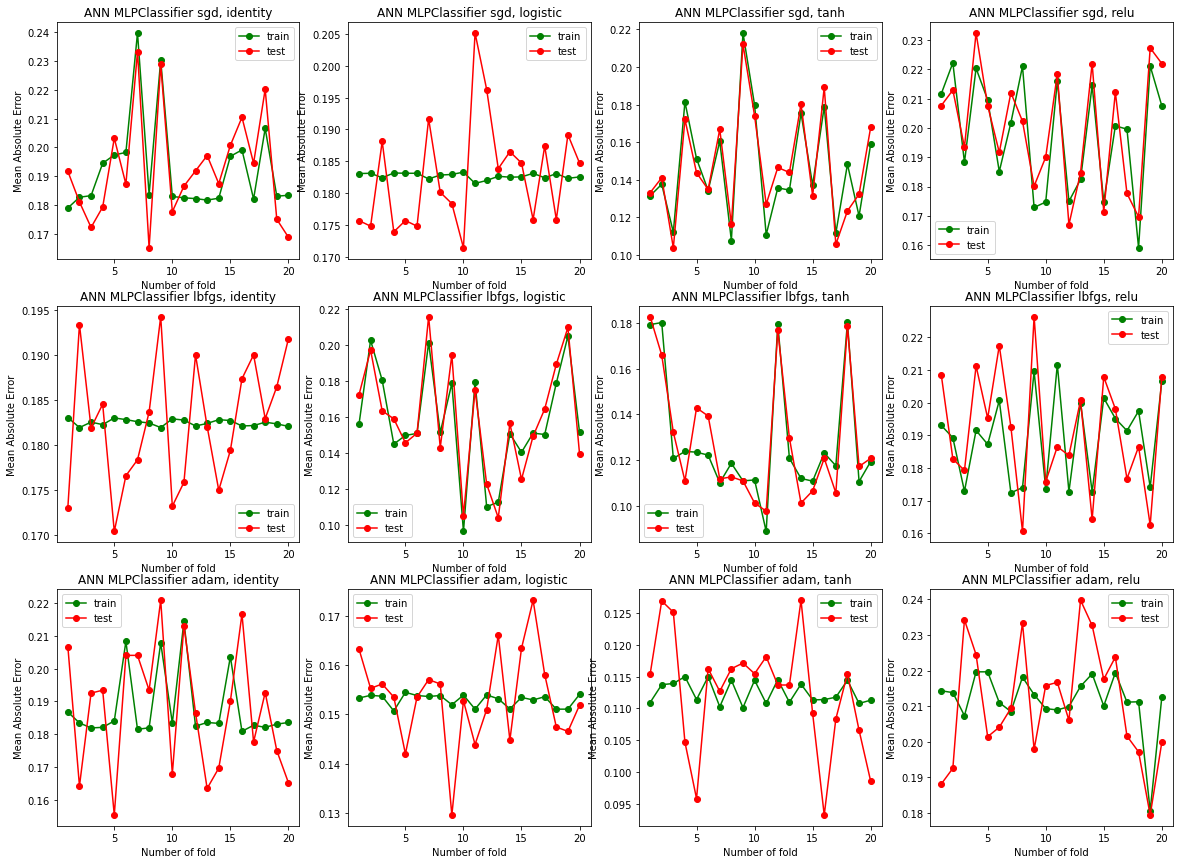

In [23]:
NetAnalysis.BuildEvaluateUsingKFold()

### Mean Absolute Error (MAE) analysis

We have observed MAE point (>.20) for **ANN MLPClassifier(sgd,identitiy) , ANN MLPClassifier(sgd,logistic) ,ANN MLPClassifier(sgd,tanh) ,ANN MLPClassifier(sgd,relu), ANN MLPClassifier(lbfgs, logistic), ANN MLPClassifier(lbfgs,relu), ANN MLPClassifier(adam,identitiy), ANN MLPClassifier(adm,relu)**. So the model **underfits** the some portion of the **test data** and **train data**. 

We have observed MAE point (<.10) for all test and training set for  **ANN MLPClassifier(lbfgs,tanh), ANN MLPClassifier(lbfgs,logistic), ANN MLPClassifier(adam, tanh)** SO the model is **overfits** the some portion of data. 
         
We have observed all MAE point are between .10 and .20 for **ANN MLPClassifier(lbfgs,identitiy),ANN MLPClassifier(lbfgs,tanh), ANN MLPClassifier(adm,logistic)**
So model is **best fit** for all portion of test and train data.



### Conclusion
**ANN MLPClassifier(solver=lbfgs,activation=identitiy), ANN MLPClassifier(solver=lbfgs,activation=tanh), ANN MLPClassifier(solver=adm,activation=logistic)** model provides simillar accuraccy, recall and f-score. it also has better MAE in KFold evaluation (i.e. < .1). These model are good choice for deployment